In [1]:
%matplotlib inline
import torch
from torchdiffeq import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

import pandas as pd
import seaborn as sns
from pyPDMP.systems import System, LinearSystem, LinearStochasticSystem

In [10]:
m = LinearStochasticSystem(k=2, b=2, lambd=0.99, mu_jump=0.3, std_jump=0.3, std_s=0.3)
x0 = 10*torch.rand(2)

sol = m.trajectory(x0, 10, 100)

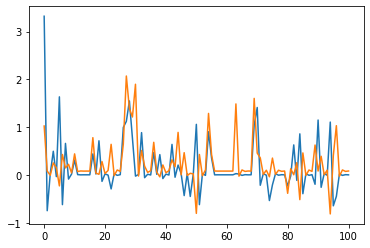

In [11]:
plt.plot(sol.numpy())

In [4]:
m.jcount

132

In [5]:
m.log

[[1.8, tensor([9.6166e-05, 9.8067e-03]), tensor([ 1.9317, -1.1154])],
 [2.3, tensor([9.6217e-05, 9.8066e-03]), tensor([-4.7682,  0.0501])],
 [2.6, tensor([9.8954e-05, 9.8011e-03]), tensor([-0.8010, -0.0603])],
 [2.7, tensor([0.0032, 0.0003]), tensor([-1.2777,  0.5019])],
 [3.3, tensor([9.6166e-05, 9.8067e-03]), tensor([-0.1123,  4.0420])],
 [3.5, tensor([1.8314e-06, 9.9963e-03]), tensor([ 2.6127, -3.7027])],
 [4.8, tensor([9.6166e-05, 9.8067e-03]), tensor([ 3.3380, -3.7936])],
 [6.5, tensor([9.6166e-05, 9.8067e-03]), tensor([-1.8695, -0.8410])],
 [6.9, tensor([9.6044e-05, 9.8070e-03]), tensor([0.7072, 4.5532])],
 [8.8, tensor([9.6166e-05, 9.8067e-03]), tensor([1.5463, 2.8288])],
 [9.0, tensor([-4.5500e-05,  1.0091e-02]), tensor([-5.5068, -0.6088])],
 [9.6, tensor([9.6166e-05, 9.8067e-03]), tensor([-0.3964, -4.1187])],
 [9.8, tensor([-0.0160,  0.0315]), tensor([-0.2491,  1.0626])],
 [10.9, tensor([9.6166e-05, 9.8067e-03]), tensor([0.5572, 0.8798])],
 [11.6, tensor([9.6166e-05, 9.8067e-0